In [5]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid') #palette="pastel" 

import warnings
warnings.filterwarnings("ignore")

##### Part I. multiple regression
###### seaborn gallary : https://seaborn.pydata.org/examples/multiple_regression.html

In [6]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


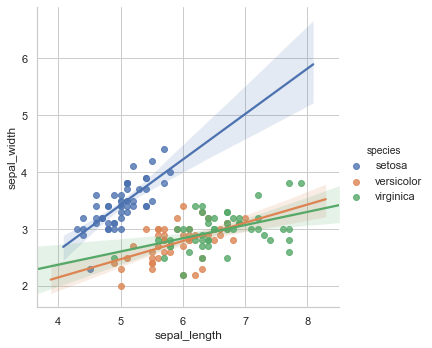

In [14]:
#### regplot에서는 hue 옵션을 줄수 없어, 전체 데이터에 대한 회귀선밖에 얻을 수 없다. 
#### 반면 lmplot은 hue 옵션을 통해 '종(species)'별로 회귀선을 얻을 수 있다. 
sns.lmplot(data=iris, x='sepal_length', y='sepal_width', hue='species')

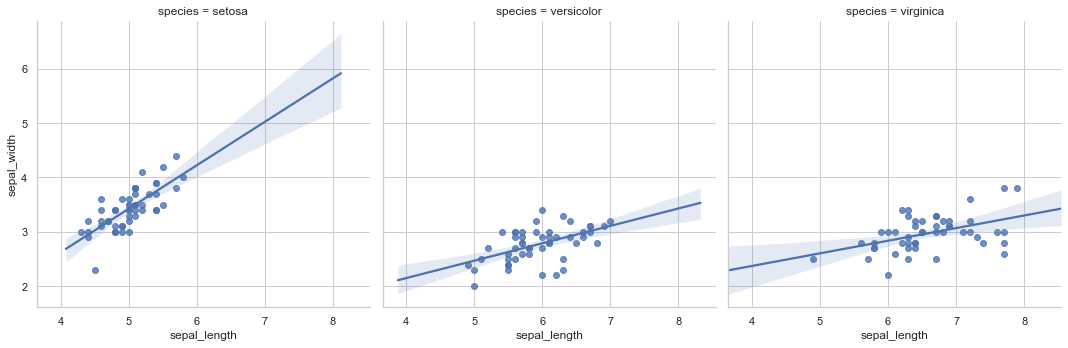

In [15]:
sns.lmplot(data=iris, x='sepal_length', y='sepal_width', col='species')  #### col 옵션을 사용한 예

##### Part II. distplot (for histogram)
###### seaborn gallary : https://www.youtube.com/watch?v=_-RoqJXe_9c

In [31]:
d =  np.random.normal(size=100)   
print(len(d))
d

100


array([-1.8434277 ,  1.2121391 , -1.05176865,  0.00339445,  0.45488024,
        0.59020602, -0.63361342, -0.9874805 ,  0.51407368, -2.47835026,
        1.44940332, -0.66688981,  0.04270672,  0.197075  , -0.07731033,
       -1.7669111 , -0.0873803 ,  0.03779005,  0.13724684, -0.72345005,
       -1.18033298, -0.21170703, -0.91056048,  0.6189979 ,  1.59767598,
        1.55635375,  0.91491263, -0.3179545 ,  1.36052303,  0.06153405,
        1.25843643, -1.13331894, -0.56607281,  0.54041886, -0.53543624,
        0.03622613,  0.9990078 ,  1.36175463, -1.14742234, -2.00637512,
       -1.51053376, -0.61017135,  0.81888828,  0.30814731, -0.47182619,
        0.40542431,  0.3239937 , -0.49952838, -2.31122425,  0.31710382,
       -0.54831626,  1.51957712, -0.65635282, -0.30959843, -0.24283714,
        1.15748884, -0.35227776,  0.23457471,  0.35862953,  1.39590237,
        0.47651135, -0.52782054,  0.39877648,  0.38192471, -0.31247506,
        1.83101701,  0.43624299, -0.95203192,  0.13277677, -1.91

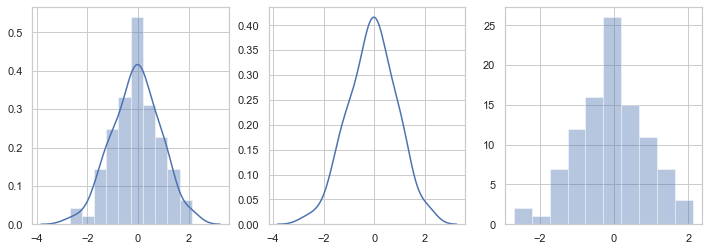

In [30]:
figure, (ax1,ax2,ax3) = plt.subplots(ncols=3)
figure.set_size_inches(12,4)

sns.distplot(d, ax=ax1)               #### default 
sns.distplot(d, hist=False, ax=ax2)   #### histogram 제거 
sns.distplot(d, kde=False, ax=ax3)    #### kde 곡선 제거 

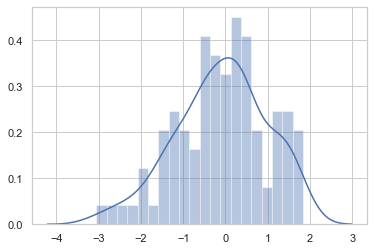

In [36]:
#### bins 옵션으로 히스토그램 구간수를 지정할 수 있다. 
sns.distplot(d, bins=20)

##### Part III. jointplot 
###### seaborn gallary : https://seaborn.pydata.org/examples/regression_marginals.html

In [40]:
tips = sns.load_dataset('tips')
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


            total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


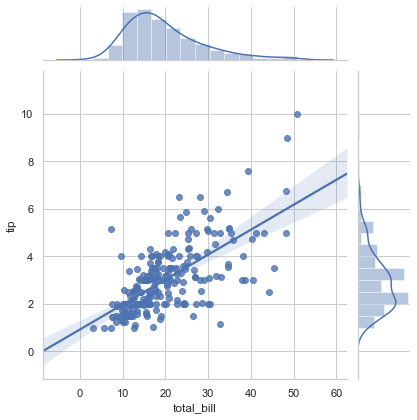

In [56]:
#### kind 옵션을 각각 reg / hex / kde 로 변경 
#### jointplot에서는 ax로 화면 나누기가 불가능 

print(tips[['total_bill','tip']].corr())
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')

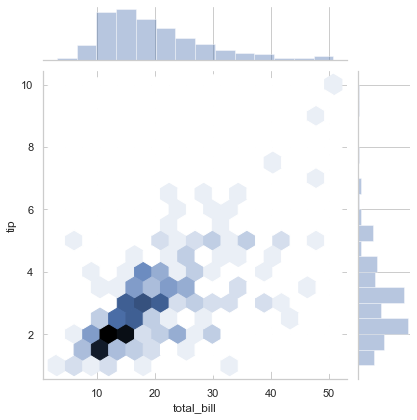

In [48]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex')

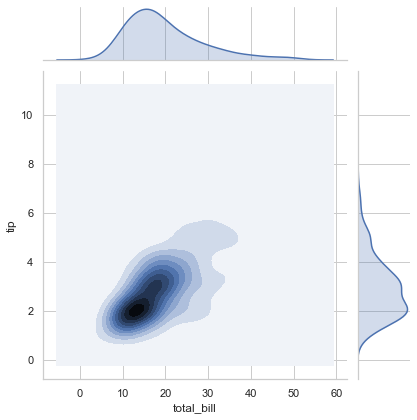

In [55]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde')

##### Part IV. FacetGrid
###### seaborn gallary : https://seaborn.pydata.org/examples/faceted_histogram.html

In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


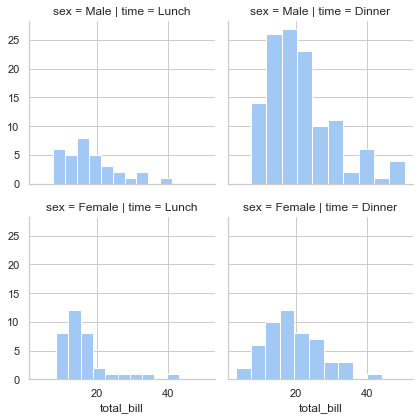

In [69]:
#### FacetGrid는 여러개의 차트를 한 화면에 간단하게 표시해준다. 
#### (1) 데이터셋과 row / col을 지정하여 이를 변수에 할당한 후, 
#### (2) map 명령어를 통해 출력 
sns.set(style = 'whitegrid', palette = 'pastel')
g = sns.FacetGrid(data=tips, row='sex', col='time')
g.map(plt.hist, 'total_bill')

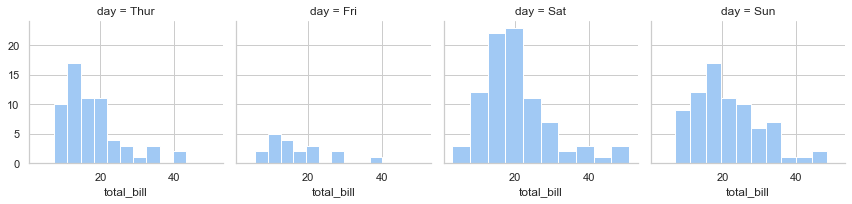

In [75]:
g = sns.FacetGrid(data=tips, col='day')
g.map(plt.hist, 'total_bill')

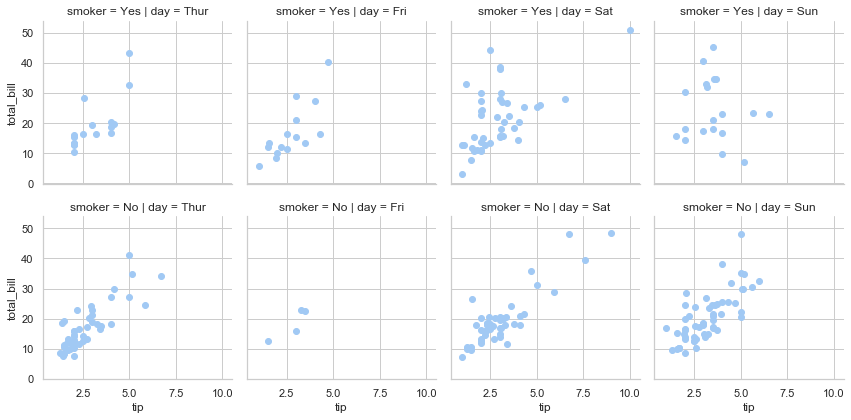

In [78]:
g = sns.FacetGrid(data=tips, row='smoker', col='day')
g.map(plt.scatter, 'tip', 'total_bill')     #### scatter에서는 비교할 두 변수를 지정해 주어야 함 

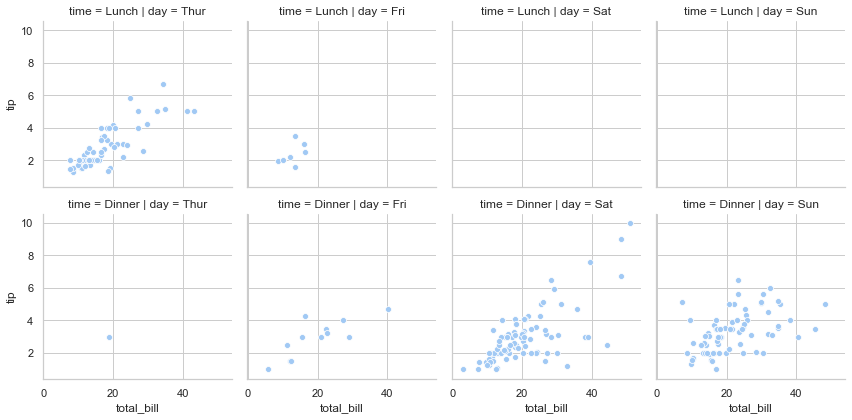

In [82]:
g = sns.FacetGrid(data=tips, row='time', col='day')
g.map(sns.scatterplot, 'total_bill', 'tip')         #### plt.plot 대신 sns.plot을 사용할 수 있다. 

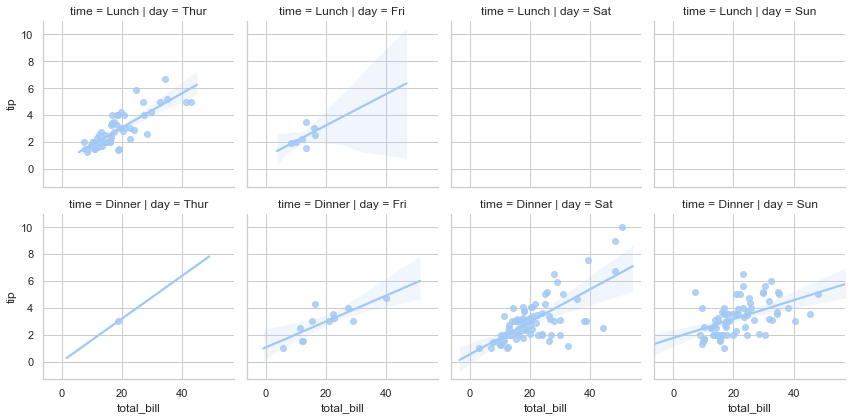

In [87]:
g = sns.FacetGrid(data=tips, row='time', col='day')
g.map(sns.regplot, 'total_bill', 'tip')

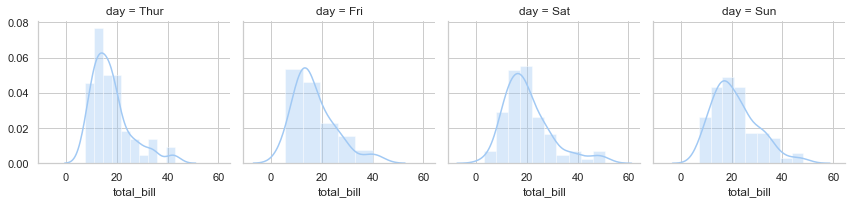

In [89]:
g = sns.FacetGrid(data=tips, col='day')
g.map(sns.distplot, 'total_bill')

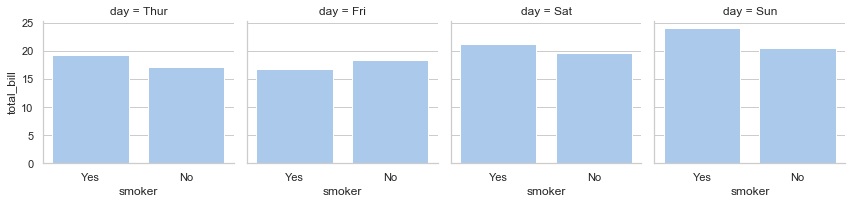

In [93]:
g = sns.FacetGrid(data=tips, col='day')
g.map(sns.barplot, 'smoker','total_bill', ci=0)

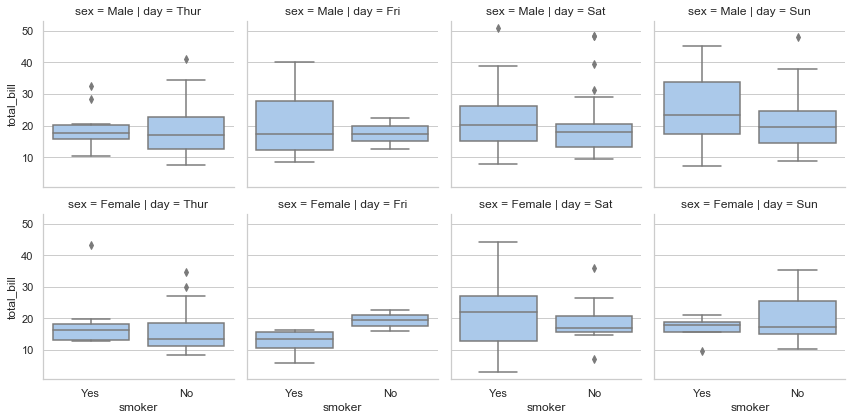

In [95]:
g = sns.FacetGrid(data=tips, row='sex', col='day')
g.map(sns.boxplot, 'smoker','total_bill')

##### Part V. pivot table, crosstab, heatmap

In [98]:
#### 피봇테이블을 만들어서 데이터 확인하기 (피봇테이블이 기본 출력값은 "평균"임 )
tips.pivot_table(index = 'time', columns = 'day', values='total_bill')

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,17.664754,12.845714,NaN,NaN
Dinner,18.780000,19.663333,20.441379,21.41


In [105]:
#### aggfunc 옵션을 조정하여 필요한 통계량을 표시하기 
print (tips.pivot_table(index = 'time', columns = 'day', values='total_bill', aggfunc='count'))
print('--------------------------------------------------------------------------------------')
print (tips.pivot_table(index = 'time', columns = 'day', values='total_bill', aggfunc='sum'))
print('--------------------------------------------------------------------------------------')
print (tips.pivot_table(index = 'time', columns = 'day', values='total_bill', aggfunc='mean'))
print('--------------------------------------------------------------------------------------')
print (tips.pivot_table(index = 'time', columns = 'day', values='total_bill', aggfunc='std'))

day     Thur   Fri   Sat   Sun
time                          
Lunch   61.0   7.0   NaN   NaN
Dinner   1.0  12.0  87.0  76.0
--------------------------------------------------------------------------------------
day        Thur     Fri     Sat      Sun
time                                    
Lunch   1077.55   89.92     NaN      NaN
Dinner    18.78  235.96  1778.4  1627.16
--------------------------------------------------------------------------------------
day          Thur        Fri        Sat    Sun
time                                          
Lunch   17.664754  12.845714        NaN    NaN
Dinner  18.780000  19.663333  20.441379  21.41
--------------------------------------------------------------------------------------
day         Thur       Fri       Sat       Sun
time                                          
Lunch   7.950334  2.842228       NaN       NaN
Dinner       NaN  9.471753  9.480419  8.832122


In [106]:
#### crosstab ~ 행과 열을 지정해 준다. 
pd.crosstab(tips['time'], tips['day'])

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,61,7,0,0
Dinner,1,12,87,76


In [107]:
#### normalize 옵션을 활성화 시키면, count값을 비율로 변환하여 나타내준다. 
pd.crosstab(tips['time'], tips['day'], normalize=True)

day,Thur,Fri,Sat,Sun
time,,,,
Lunch,0.250000,0.028689,0.000000,0.000000
Dinner,0.004098,0.049180,0.356557,0.311475


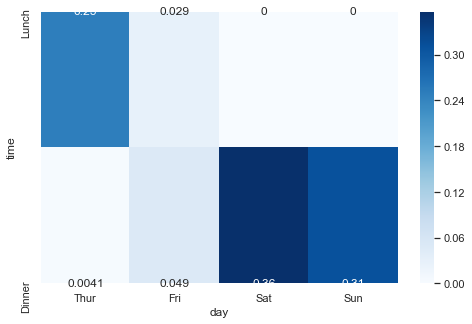

In [123]:
#### normalize된 crosstab을 heatmap으로 시각화  
c = pd.crosstab(tips['time'], tips['day'], normalize=True)
plt.figure(figsize=(8,5))
sns.heatmap(c, annot=True, cmap='Blues')